In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 80)
pd.set_option('display.max_colwidth', 50)

## Exploratory Analysis into our cleansed_profile.csv

In [2]:
df = pd.read_csv('cleansed_profile.csv')

In [3]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,smokes_code,drinks_code,all_essay,essay_total_length,average_word_length,count_word_i_and_me,drugs_code
0,22,a little extra,strictly anything,socially,never,college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,mixed,75.0,0,transportation,2012-06-28-20-30,"south san francisco, california","does not have kids, but might want them",straight,likes dogs and likes cats,agnosticism,m,gemini,sometimes,english,single,2,2,about me:<br />\n<br />\ni would love to think...,2644,0.816944,159,0
1,35,average,mostly other,often,sometimes,space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,,,i am very open and will share just about anyth...,,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","does not have kids, but might want them",straight,likes dogs and likes cats,agnosticism,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,1,3,i am a chef: this is what that means.<br />\n1...,1457,0.804393,103,1
2,38,thin,anything,socially,never,Masters Graduate,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",prefer not to mention,68.0,0,rather not say,2012-06-27-09-10,"san francisco, california",has not thought about it yet,straight,has cats,prefer not to mention,m,pisces,no,"english, french, c++",available,1,2,"i'm not ashamed of much, but writing public te...",5518,0.838891,372,0
3,23,thin,vegetarian,socially,never,college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",,cats and german philosophy,,,you feel so inclined.,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",does not want kids,straight,likes cats,prefer not to mention,m,pisces,no,"english, german (poorly)",single,1,2,i work in a library and go to school. . . read...,480,0.825000,32,0
4,29,athletic,other,socially,never,College/University Graduate,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",,,,,,mixed,66.0,0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",has not thought about it yet,straight,likes dogs and likes cats,prefer not to mention,m,aquarius,no,english,single,1,2,hey how's it going? currently vague on the pro...,730,0.830137,39,0


In [4]:
df.describe()

,age,height,income,smokes_code,drinks_code,essay_total_length,average_word_length,count_word_i_and_me,drugs_code
count,59938.000000,59938.000000,59938.000000,59938.000000,59938.000000,59938.000000,59938.000000,59938.000000,59938.000000
mean,32.339251,68.301578,20018.685976,1.258317,1.909490,2210.926607,0.787137,150.411258,0.142647
std,9.447874,3.944610,97269.680673,0.920986,0.689153,2020.305006,0.156755,139.475433,0.368712
min,18.000000,26.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000
25%,26.000000,66.000000,0.000000,1.000000,2.000000,950.000000,0.810956,64.000000,0.000000
50%,30.000000,68.000000,0.000000,1.000000,2.000000,1787.000000,0.820046,121.000000,0.000000
75%,37.000000,71.000000,0.000000,1.000000,2.000000,2930.000000,0.828502,198.000000,0.000000
max,109.000000,95.000000,1000000.000000,4.000000,5.000000,96277.000000,0.995825,6153.000000,2.000000


In [5]:
# inspecting the correlations coefficient
correlation_coefficient = df.corr(method = 'pearson')
correlation_coefficient

,age,height,income,smokes_code,drinks_code,essay_total_length,average_word_length,count_word_i_and_me,drugs_code
age,1.000000,-0.022682,-0.000855,-0.096102,-0.121964,0.078846,-0.003402,0.083675,-0.116429
height,-0.022682,1.000000,0.068419,0.029005,0.037113,0.011464,-0.010379,0.007240,0.055183
income,-0.000855,0.068419,1.000000,0.038856,0.041078,0.011228,0.010389,0.005971,0.073381
smokes_code,-0.096102,0.029005,0.038856,1.000000,0.096009,-0.012240,0.007972,-0.015707,0.265479
drinks_code,-0.121964,0.037113,0.041078,0.096009,1.000000,-0.042740,-0.000828,-0.045942,0.170445
essay_total_length,0.078846,0.011464,0.011228,-0.012240,-0.042740,1.000000,0.274758,0.986864,0.043657
average_word_length,-0.003402,-0.010379,0.010389,0.007972,-0.000828,0.274758,1.000000,0.274906,0.021007
count_word_i_and_me,0.083675,0.007240,0.005971,-0.015707,-0.045942,0.986864,0.274906,1.000000,0.041638
drugs_code,-0.116429,0.055183,0.073381,0.265479,0.170445,0.043657,0.021007,0.041638,1.000000


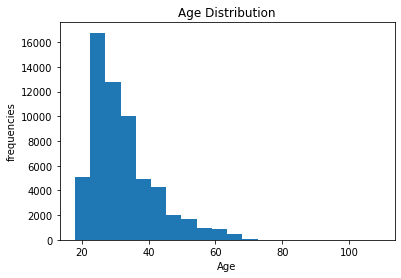

In [6]:
# plot age distribution using Pandas and Matplotlib
age_data = df['age']
age_data.hist(bins = 20, grid = False)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('frequencies')
plt.show()

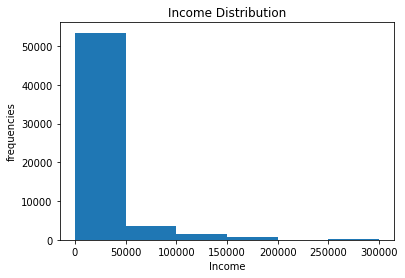

In [7]:
income_data = df['income']
plt.hist(income_data, range = (0, 300000), bins = 6)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('frequencies')
plt.show()

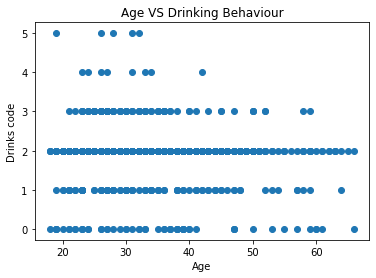

In [8]:
# plot scatter chart to see whether there is a relationship between age vs drinking behaviour
age_data = df['age'].head(1000)
drinks_data = df['drinks_code'].head(1000)
plt.scatter(age_data, drinks_data)
plt.title('Age VS Drinking Behaviour')
plt.xlabel('Age')
plt.ylabel('Drinks code')
plt.show()

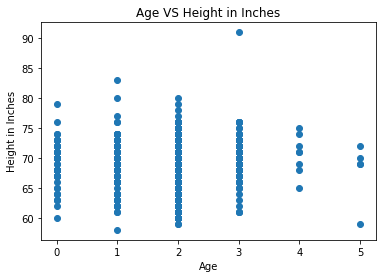

In [9]:
height_data = df['height'].head(1000)
plt.scatter(drinks_data , height_data)
plt.title('Age VS Height in Inches')
plt.xlabel('Age')
plt.ylabel('Height in Inches')
plt.show()

In [10]:
df.groupby('sex').age.mean()

sex
f    32.815494
m    32.018702
Name: age, dtype: float64

In [11]:
df.groupby('sex').income.mean()

sex
f    11184.42334
m    25964.82903
Name: income, dtype: float64

## Building Machine Learning Algorithm to predict the horoscope sign of the users

In [15]:
# define the features used to predict the horoscope sign
features = df[['smokes_code', 'drinks_code', 'drugs_code', 'essay_total_length',
              'average_word_length']]
features

,smokes_code,drinks_code,drugs_code,essay_total_length,average_word_length
0,2,2,0,2644,0.816944
1,1,3,1,1457,0.804393
2,1,2,0,5518,0.838891
3,1,2,0,480,0.825000
4,1,2,0,730,0.830137
...,...,...,...,...,...
59933,1,2,0,1652,0.816586
59934,1,3,1,2997,0.848182
59935,1,0,0,1853,0.828926
59936,4,2,2,1998,0.817317


In [16]:
# scaling the features using Z-Score Normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features

array([[ 0.80532085,  0.13133653, -0.3868831 ,  0.21436219,  0.19015292],
       [-0.280481  ,  1.58240544,  2.32528057, -0.37317776,  0.11008174],
       [-0.280481  ,  0.13133653, -0.3868831 ,  1.63693154,  0.33016179],
       ...,
       [-0.280481  , -2.77080129, -0.3868831 , -0.17716612,  0.26659168],
       [ 2.97692456,  0.13133653,  5.03744424, -0.10539418,  0.19253432],
       [ 0.80532085,  0.13133653, -0.3868831 ,  0.61133526,  0.21757174]])

In [17]:
scaled_features_df = pd.DataFrame(scaled_features, columns = features.columns)
scaled_features_df

,smokes_code,drinks_code,drugs_code,essay_total_length,average_word_length
0,0.805321,0.131337,-0.386883,0.214362,0.190153
1,-0.280481,1.582405,2.325281,-0.373178,0.110082
2,-0.280481,0.131337,-0.386883,1.636932,0.330162
3,-0.280481,0.131337,-0.386883,-0.856772,0.241546
4,-0.280481,0.131337,-0.386883,-0.733027,0.274317
...,...,...,...,...,...
59933,-0.280481,0.131337,-0.386883,-0.276657,0.187869
59934,-0.280481,1.582405,2.325281,0.389090,0.389431
59935,-0.280481,-2.770801,-0.386883,-0.177166,0.266592
59936,2.976925,0.131337,5.037444,-0.105394,0.192534


In [18]:
# next, we will be split the data 80:20 
# 80% training data and 20% test data
from sklearn.model_selection import train_test_split

labels = df['sign']
train_data, test_data, train_label, test_label = train_test_split(scaled_features_df,
                                                                 labels, test_size = 0.2,
                                                                  random_state = 100)

In [25]:
# then, we will use KNN Algorithm to predict the horoscope sign based on the features
# the reason is we need a discrete output. 
from sklearn.neighbors import KNeighborsClassifier

KNN_classifier = KNeighborsClassifier(n_neighbors = 13)
KNN_classifier.fit(train_data, train_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [27]:
test_predict = KNN_classifier.predict(test_data)
test_predict

array(['capricorn', 'aries', 'prefer not to mention', ...,
       'prefer not to mention', 'libra', 'prefer not to mention'],
      dtype=object)

In [28]:
train_accuracy = KNN_classifier.score(train_data, train_label)
test_accuracy = KNN_classifier.score(test_data, test_label)
print(train_accuracy)
print(test_accuracy)

0.25904066736183523
0.13063063063063063


In [30]:
k_neighbors = range(1,100)
accuracies = []

for k in k_neighbors:
    KNN_classifier = KNeighborsClassifier(n_neighbors = k)
    KNN_classifier.fit(train_data, train_label)
    test_accuracy = KNN_classifier.score(test_data, test_label)
    accuracies.append(test_accuracy)    

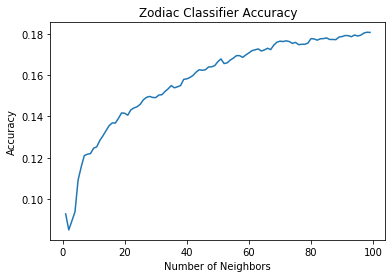

In [32]:
plt.plot(k_neighbors, accuracies)
plt.title('Zodiac Classifier Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

### In conclusion, it seems the highest accuracy we can achieve with our current KNN Algorithm and current features to predict the horoscope sign is 18%. This 18% can be achieved with 90 neighbors. 

### Furthermore, we used 13 neighbors at first and only achieved 13% accuracy. 

### There is definitely a lot of room for improvement to be make here with my KNN Algorithm.